Задание 3.4

In [162]:
from skimage.io import imread, imshow
from skimage import img_as_float, img_as_ubyte
%matplotlib inline
import numpy as np

In [163]:
img = imread('landscape.png')

In [164]:
hist = [0]*256
for i in img.flatten():
    hist[i] += 1
hist = np.array(hist)

In [165]:
# Делаем cdf
cdf = [0]*256
for i in range(257):
    summ = 0
    for i in range(i):
        summ += hist[i]
    cdf[i] = summ

In [166]:
cdf_c = sorted(list(set(cdf))) # убираем повторяющиеся значения через множество и сортируем
if cdf_c[0] == 0:
    min_cdf = cdf_c[1]
else:
    min_cdf = cdf_c[0]

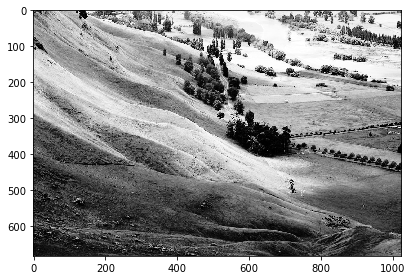

In [167]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        p = img[i][j]
        img[i][j] = round(255 * (cdf[p] - min_cdf) / (img.size - 1))
imshow(img)

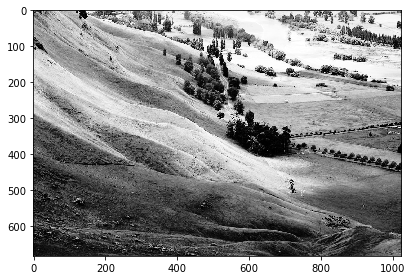

In [159]:
imshow(imread('landscape-histeq.png'))

In [160]:
np.array_equal(img, imread('landscape-histeq.png'))

True